# Fraud detection in financial transactions

### A model to accurately detect and label fraudulent financial transactions amidst a sea of regular online transactions. 

### Dataset is a Paysim automatically generated synthetic financial data with examples resembling tat of a real life transaction

#### Impoting necessaary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the dataset

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))




/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv


In [ ]:
fin_data=pd.read_csv('/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv')

In [ ]:
fin_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


#### Exploratory Data Analysis

Getting information about the dataset 

In [ ]:
fin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
fin_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Checking for missing values

In [ ]:
fin_data.isnull().sum() #No missing value is observed. This is consistent with the fact that this is a synthetic data.

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<Axes: ylabel='count'>

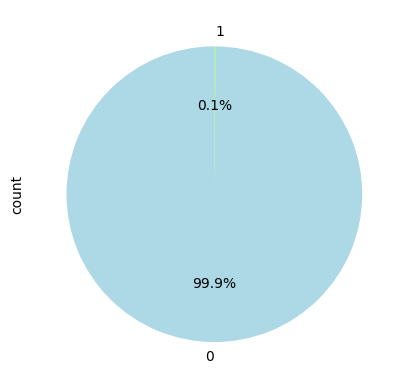

In [ ]:
fin_data['isFraud'].value_counts().plot(kind='pie', autopct = '%1.1f%%', startangle=90, colors = ['#add8e6', '#90ee90'])

<Axes: xlabel='type', ylabel='count'>

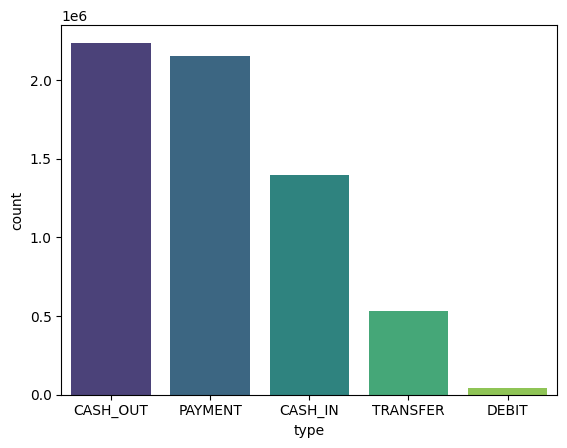

In [ ]:
sns.countplot(data=fin_data, x='type', palette='viridis', order=fin_data['type'].value_counts().index)

In [ ]:
fin_data.groupby(['type', 'isFraud']).size().unstack()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


isFraud,0,1
type,,
CASH_IN,1399284.0,NaN
CASH_OUT,2233384.0,4116.0
DEBIT,41432.0,NaN
PAYMENT,2151495.0,NaN
TRANSFER,528812.0,4097.0


In [ ]:
fin_data.select_dtypes(include='number').corr()['isFraud'].sort_values(ascending=False)

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64

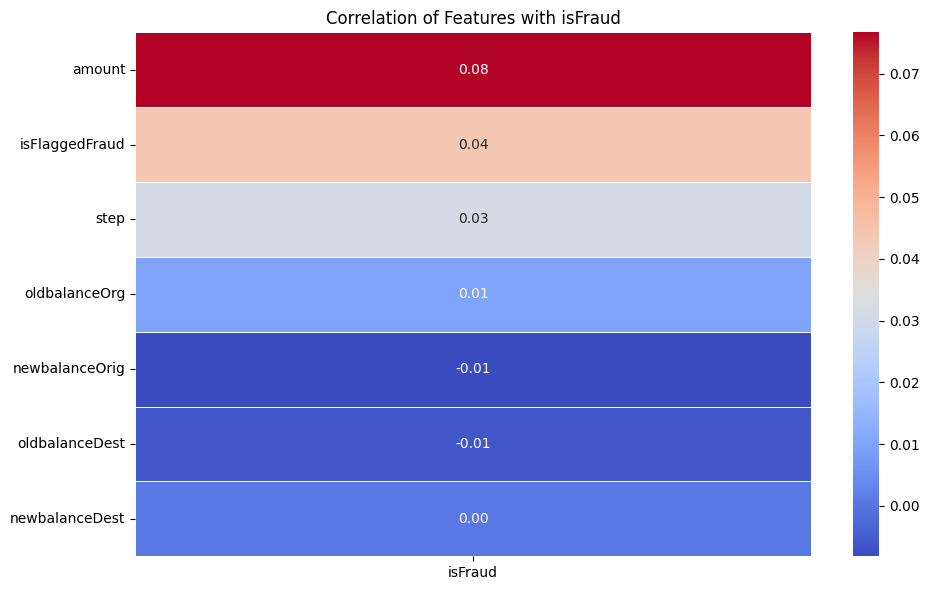

In [ ]:
#Correlation with isFraud

num_findata = fin_data.select_dtypes(include='number')

num_corr = num_findata.corr()

isFraud_corr = num_corr['isFraud'].drop('isFraud').sort_values(key=abs, ascending=False)

#plotting the map

plt.figure(figsize=(10,6))
sns.heatmap(isFraud_corr.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', linewidth=0.6)
plt.title('Correlation of Features with isFraud')
plt.tight_layout()

plt.savefig('isFraud correlation map.png')

#### Feature Engineering

##### Transaction Amount Ratio

In [ ]:
amount_ratio = fin_data['amount']/(fin_data['oldbalanceOrg'] + 1)

In [ ]:
fin_data['amount_ratio'] = amount_ratio

In [ ]:
fin_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_ratio
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0.057834
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0.087731
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0.994505
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0.994505
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0.280788
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,0.999997
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,1.000000
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,1.000000
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0.999999


##### Balance Change

In [ ]:
fin_data['Balance_change'] = fin_data['oldbalanceOrg'] - fin_data['newbalanceOrig']

##### Sender Transaction Amount

In [ ]:
fin_data['Sender_transaction_count'] = fin_data.groupby('nameOrig')['nameOrig'].transform('count')

In [ ]:
fin_data['Sender_transaction_count'].value_counts()

Sender_transaction_count
1    6344009
2      18566
3         45
Name: count, dtype: int64

In [ ]:
fin_data['High_risk_transaction'] = fin_data['type'].apply(lambda x: 1 if x in ['Transfer', 'CASH_OUT'] else 0)

In [ ]:
fin_data['High amount'] = (fin_data['amount'] > 200000).astype(int)

In [ ]:
fin_data['Orig_avgAmount'] = fin_data.groupby('nameOrig')['amount'].transform('mean')

fin_data['Suspicious amount'] =  (fin_data['amount'] > fin_data['Orig_avgAmount'] * 5).astype(int)

In [ ]:
fin_data[30:80]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_ratio,Balance_change,Sender_transaction_count,High_risk_transaction,High amount,Orig_avgAmount,Suspicious amount
30,1,PAYMENT,3448.92,C2103763750,0.00,0.00,M335107734,0.00,0.00,0,0,3448.920000,0.00,1,0,0,3448.92,0
31,1,PAYMENT,4206.84,C215078753,0.00,0.00,M1757317128,0.00,0.00,0,0,4206.840000,0.00,1,0,0,4206.84,0
32,1,PAYMENT,5885.56,C840514538,0.00,0.00,M1804441305,0.00,0.00,0,0,5885.560000,0.00,1,0,0,5885.56,0
33,1,PAYMENT,5307.88,C1768242710,0.00,0.00,M1971783162,0.00,0.00,0,0,5307.880000,0.00,1,0,0,5307.88,0
34,1,PAYMENT,5031.22,C247113419,0.00,0.00,M151442075,0.00,0.00,0,0,5031.220000,0.00,1,0,0,5031.22,0
35,1,PAYMENT,24213.67,C1238616099,0.00,0.00,M70695990,0.00,0.00,0,0,24213.670000,0.00,1,0,0,24213.67,0
36,1,PAYMENT,8603.42,C1608633989,253.00,0.00,M1615617512,0.00,0.00,0,0,33.871732,253.00,1,0,0,8603.42,0
37,1,PAYMENT,2791.42,C923341586,300481.00,297689.58,M107994825,0.00,0.00,0,0,0.009290,2791.42,1,0,0,2791.42,0
38,1,PAYMENT,7413.54,C1470868839,297689.58,290276.03,M1426725223,0.00,0.00,0,0,0.024904,7413.55,1,0,0,7413.54,0
39,1,PAYMENT,3295.19,C711197015,233633.00,230337.81,M1384454980,0.00,0.00,0,0,0.014104,3295.19,1,0,0,3295.19,0


In [ ]:
findata_v2 = fin_data.drop(['nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'isFlaggedFraud'], axis=1)

In [ ]:
findata_v2['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
findata_v2.corr(numeric_only=True)['isFraud'].sort_values(ascending=False)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


isFraud                     1.000000
Balance_change              0.362472
amount                      0.076688
Orig_avgAmount              0.076671
High amount                 0.032916
step                        0.031578
High_risk_transaction       0.011256
newbalanceDest              0.000535
Sender_transaction_count    0.000316
amount_ratio               -0.004915
oldbalanceDest             -0.005885
Suspicious amount                NaN
Name: isFraud, dtype: float64

#### Feature Scaling

In [ ]:
findata_v2.head()

,step,type,amount,oldbalanceDest,newbalanceDest,isFraud,amount_ratio,Balance_change,Sender_transaction_count,High_risk_transaction,High amount,Orig_avgAmount,Suspicious amount
0,1,PAYMENT,9839.64,0.0,0.0,0,0.057834,9839.64,1,0,0,9839.64,0
1,1,PAYMENT,1864.28,0.0,0.0,0,0.087731,1864.28,1,0,0,1864.28,0
2,1,TRANSFER,181.00,0.0,0.0,1,0.994505,181.00,1,0,0,181.00,0
3,1,CASH_OUT,181.00,21182.0,0.0,1,0.994505,181.00,1,1,0,181.00,0
4,1,PAYMENT,11668.14,0.0,0.0,0,0.280788,11668.14,1,0,0,11668.14,0


In [ ]:
fin_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_ratio,Balance_change,Sender_transaction_count,High_risk_transaction,High amount,Orig_avgAmount,Suspicious amount
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0.057834,9839.64,1,0,0,9839.64,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0.087731,1864.28,1,0,0,1864.28,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0.994505,181.00,1,0,0,181.00,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0.994505,181.00,1,1,0,181.00,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0.280788,11668.14,1,0,0,11668.14,0


In [ ]:
#encoding

findata_v3 = pd.get_dummies(findata_v2, columns=['type'], drop_first = True)

In [ ]:
findata_v3

,step,amount,oldbalanceDest,newbalanceDest,isFraud,amount_ratio,Balance_change,Sender_transaction_count,High_risk_transaction,High amount,Orig_avgAmount,Suspicious amount,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,0.00,0.00,0,0.057834,9839.64,1,0,0,9839.64,0,False,False,True,False
1,1,1864.28,0.00,0.00,0,0.087731,1864.28,1,0,0,1864.28,0,False,False,True,False
2,1,181.00,0.00,0.00,1,0.994505,181.00,1,0,0,181.00,0,False,False,False,True
3,1,181.00,21182.00,0.00,1,0.994505,181.00,1,1,0,181.00,0,True,False,False,False
4,1,11668.14,0.00,0.00,0,0.280788,11668.14,1,0,0,11668.14,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,0.00,339682.13,1,0.999997,339682.13,1,1,1,339682.13,0,True,False,False,False
6362616,743,6311409.28,0.00,0.00,1,1.000000,6311409.28,1,0,1,6311409.28,0,False,False,False,True
6362617,743,6311409.28,68488.84,6379898.11,1,1.000000,6311409.28,1,1,1,6311409.28,0,True,False,False,False
6362618,743,850002.52,0.00,0.00,1,0.999999,850002.52,1,0,1,850002.52,0,False,False,False,True


In [ ]:
!pip install -U scikit-learn imbalanced-learn --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 81.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Features and target
X_fin = findata_v3.drop('isFraud', axis=1)
y_fin = findata_v3['isFraud']

# Pipeline with scaling + SMOTE + classifier
pipeline = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Evaluate using cross-validation
scores = cross_val_score(pipeline, X_fin, y_fin, cv=5, scoring='f1')

print("Cross-validated F1-score:", scores.mean())


Cross-validated F1-score: 0.5711243872116214


In [ ]:
fin_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_ratio,Balance_change,Sender_transaction_count,High_risk_transaction,High amount,Orig_avgAmount,Suspicious amount
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0.057834,9839.64,1,0,0,9839.64,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0.087731,1864.28,1,0,0,1864.28,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0.994505,181.00,1,0,0,181.00,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0.994505,181.00,1,1,0,181.00,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0.280788,11668.14,1,0,0,11668.14,0


In [ ]:
from sklearn.model_selection import train_test_split

train_findata, test_findata = train_test_split(fin_data, test_size=0.2)

In [ ]:
print ('No of training set: ', len(train_findata))
print ('No of test set: ', len(test_findata))

No of training set:  5090096
No of test set:  1272524


In [ ]:
train_percent = ((len(train_findata)/len(fin_data))*100)

print (train_percent)

80.0
